In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/train.csv')

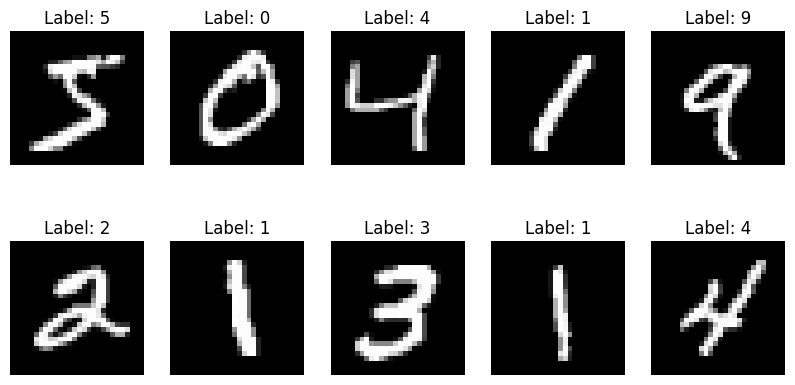

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)#row,column
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (48000, 784)
Validation set shape: (12000, 784)


KNN Validation Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.96      1.00      0.98      1322
           2       0.98      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.99      0.94      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



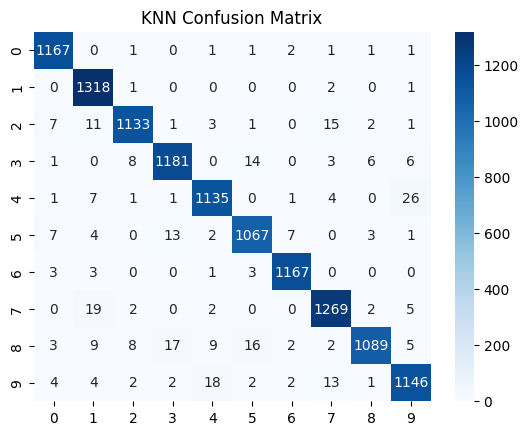

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9352
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.91      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.90      0.90      0.90      1104
           6       0.97      0.96      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.94      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



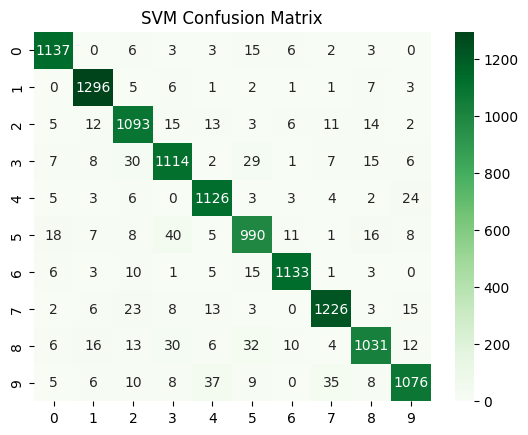

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
y_test_pred_svm = svm_model.predict(X_test_flat)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f'SVM Test Accuracy: {test_acc_svm:.4f}')

SVM Test Accuracy: 0.9351


KNN Validation Accuracy: 0.9741
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.97      1.00      0.98      1322
           2       0.98      0.96      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.98      0.99      0.99      1177
           7       0.97      0.97      0.97      1299
           8       0.99      0.95      0.97      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



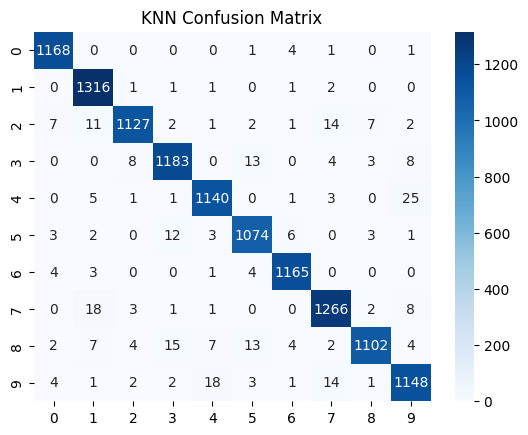

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)#overfit , chances of high accuracy
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

SVM Validation Accuracy: 0.9776
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.98      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.97      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



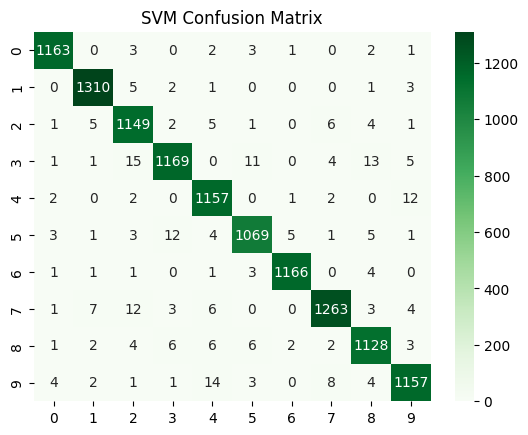

In [ ]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

KNN Validation Accuracy: 0.9696
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.95      1.00      0.97      1322
           2       0.98      0.96      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.96      0.97      1176
           5       0.96      0.97      0.96      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.97      0.97      1299
           8       0.99      0.93      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



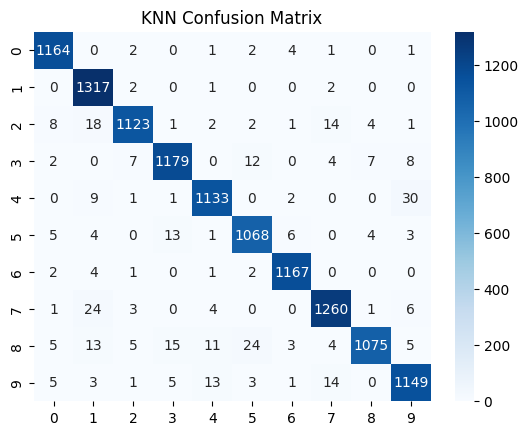

In [25]:

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

In [26]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()

clf.fit(X_train_split, y_train_split)

y_val_pred_clf = clf.predict(X_val)#random seeding no random_state given so different ans different run

clf_acc = accuracy_score(y_val, y_val_pred_clf)
print(f'clf Validation Accuracy: {clf_acc:.4f}')

print(classification_report(y_val, y_val_pred_clf))
#tree.plot_tree(clf)
#sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
#plt.title("SVM Confusion Matrix")
#plt.show()

clf Validation Accuracy: 0.8691
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1175
           1       0.93      0.96      0.95      1322
           2       0.86      0.86      0.86      1174
           3       0.83      0.83      0.83      1219
           4       0.85      0.87      0.86      1176
           5       0.83      0.82      0.83      1104
           6       0.91      0.90      0.90      1177
           7       0.90      0.90      0.90      1299
           8       0.82      0.78      0.80      1160
           9       0.82      0.84      0.83      1194

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [27]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)

clf.fit(X_train_split, y_train_split)

y_val_pred_clf = clf.predict(X_val)#random seeding no random_state given so different ans different run

clf_acc = accuracy_score(y_val, y_val_pred_clf)
print(f'clf Validation Accuracy: {clf_acc:.4f}')

print(classification_report(y_val, y_val_pred_clf))
#tree.plot_tree(clf)
#sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
#plt.title("SVM Confusion Matrix")
#plt.show()

clf Validation Accuracy: 0.8681
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1175
           1       0.93      0.96      0.95      1322
           2       0.85      0.85      0.85      1174
           3       0.84      0.84      0.84      1219
           4       0.86      0.87      0.86      1176
           5       0.83      0.81      0.82      1104
           6       0.90      0.89      0.90      1177
           7       0.90      0.91      0.90      1299
           8       0.82      0.79      0.80      1160
           9       0.82      0.84      0.83      1194

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



In [ ]:
'''from sklearn import ensemble
rf=ensemble.RandomForestClassifier(random_state=42)

rf.fit(X_train_split, y_train_split)

y_val_pred_rf = rf.predict(X_val)#random seeding no random_state given so different ans different run

rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'clf Validation Accuracy: {rf_acc:.4f}')

print(classification_report(y_val, y_val_pred_rf))
#tree.plot_tree(clf)
#sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
#plt.title("SVM Confusion Matrix")
#plt.show()